In [1]:
import pandas as pd
import eda_toolbox

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing dataset
file = '/StackPath Assignment/authors.csv'
df = pd.read_csv(file) 

<h1>Analyzing text statistics overall</h1>

In [3]:
df.shape

(19579, 3)

In [4]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
df.describe().T

,count,unique,top,freq
id,19579,19579,id26305,1
text,19579,19579,"This process, however, afforded me no means of...",1
author,19579,3,EAP,7900


Number of Samples: 19579,
Number of Features: 3,
Duplicated Entries: 0,
Null Entries: 0,          
Number of Rows with Null Entries: 0 0.0%


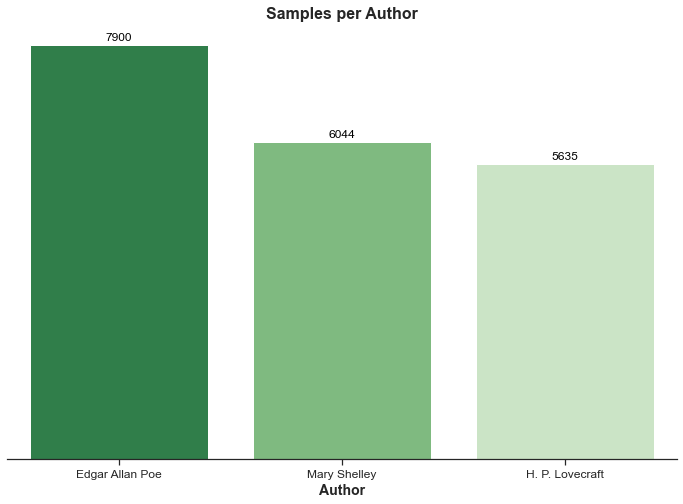

In [6]:
eda_toolbox.initial_insight(df)

><ul>
    <li>Edgar Allan Poe (EAP) contains more samples if compared to the other two authors. However, the difference is not as critical as it would require any strategy for data unbalance for now.</li>
    <li>In case the model shows a bias toward EAP, we could remove some samples or use strategies to generate additional samples for this author.</li>
</ul>

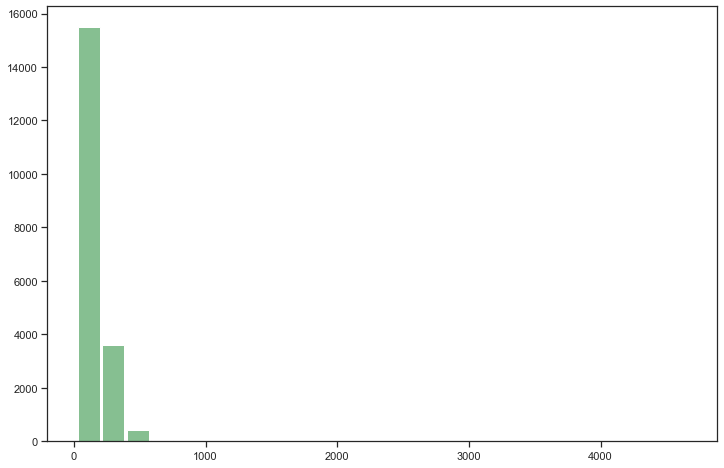

In [7]:
eda_toolbox.plot_character_length_histogram(df['text'])

On this histogram we can see that max length of characters is more then 4000 by excerpt. Huge majority of the excerpts (about 15500 of total = 19579) has a length of up to about 170 characters.

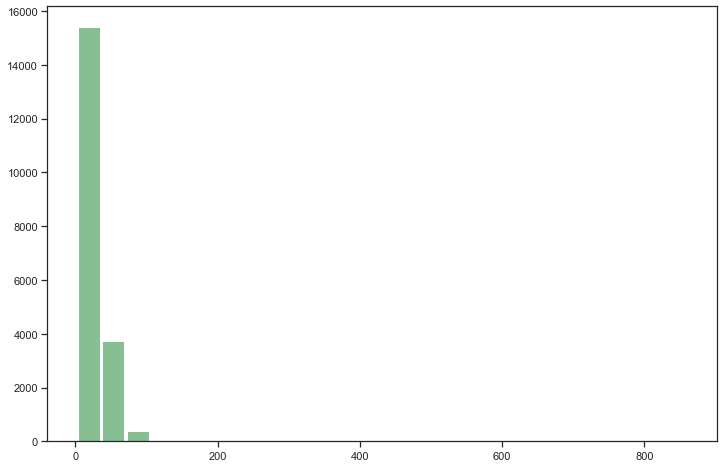

In [8]:
eda_toolbox.plot_word_number_histogram(df['text'])

On this histogram we can see that max number of words is more then 800 by excerpt. Huge majority of the excerpts (about 15500 of total = 19579) has from few to 170 words.

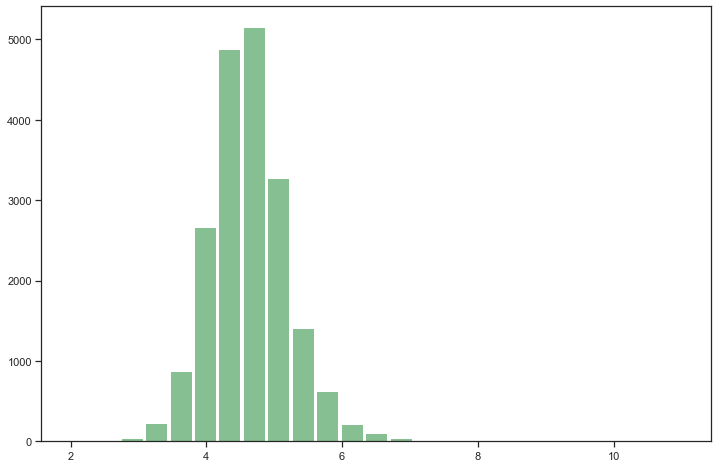

In [9]:
eda_toolbox.plot_word_length_histogram(df['text'])

<h4>SAMPLING</h4>

As we have a large amount of data we can make <b>sample</b> of whole dataset using e.g. one quarter (25%) of data. 

><b>Sampling is very useful and sometimes mandatory if we have a huge amount of data!</b>

><h3><b>NOTE!</b></h3>
As the sample function return <b>random</b> sample results may vary.

In [10]:
#You can change percentage
percentage = 25 #10 - for 10% of whole dataset
sample = df.sample(frac=percentage/100)

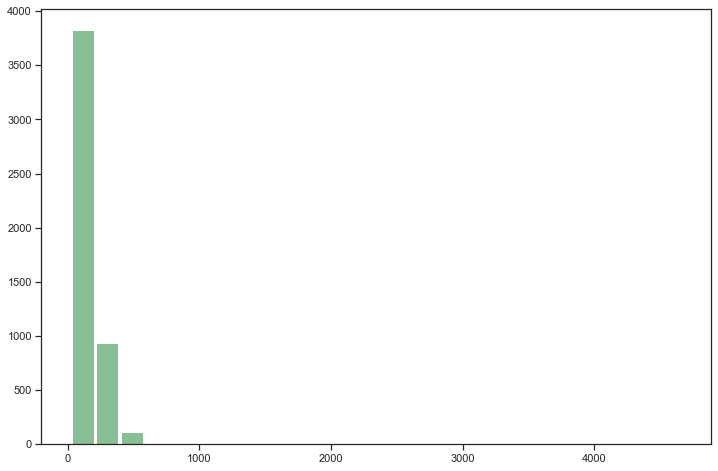

In [11]:
eda_toolbox.plot_character_length_histogram(sample['text'])

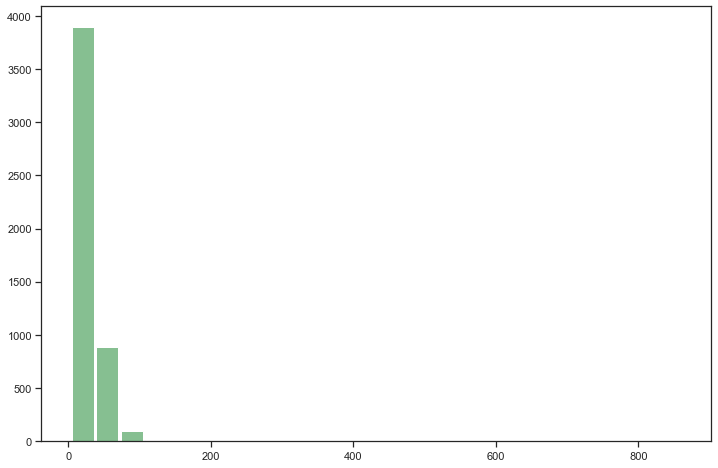

In [12]:
eda_toolbox.plot_word_number_histogram(sample['text'])

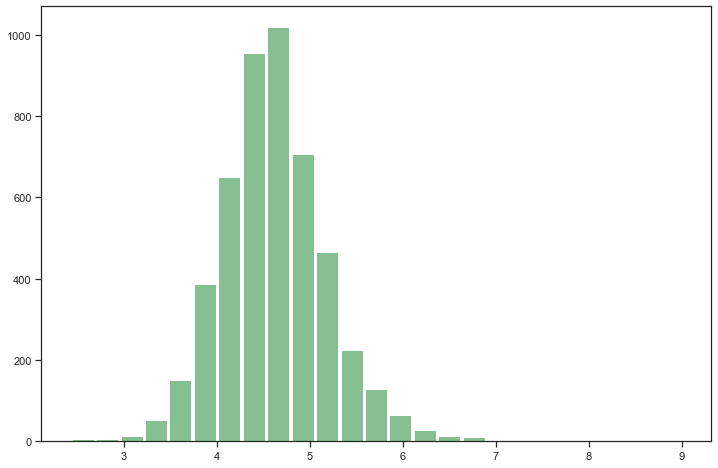

In [13]:
eda_toolbox.plot_word_length_histogram(sample['text'])

The average word length ranges between 3 to 10. Majority of words have legth of about 5 characters per word.

That can be because of influence of <b><a href = "https://www.ranks.nl/stopwordsstopwords">stopwords</a></b> (such as <i>"the"," a"," an", "being", "below"</i> etc.)

<h3>Creating the corpus and plotting the frequency of stopwords</h3>

In [14]:
corpus, present_stopwords = eda_toolbox.create_stopwords_corpus(df['text'])



Number of stopwords in present dataset:  155 


defaultdict(<class 'int'>, {'me': 2015, 'no': 1500, 'of': 20851, 'the': 33296, 'my': 5037, 'as': 3528, 'its': 1215, 'and': 17059, 'to': 12615, 'being': 360, 'so': 1395, 'once': 312, 'that': 5988, 'be': 2268, 'a': 10359, 'his': 3802, 'was': 6440, 'from': 2758, 'he': 3422, 'down': 378, 'all': 1691, 'with': 4207, 'an': 1644, 'is': 2533, 'we': 1347, 'on': 2285, 'by': 2725, 'in': 8787, 'not': 3048, 'but': 2521, 'over': 539, 'at': 2925, 'under': 270, 'your': 638, 'has': 486, 'have': 2089, 'it': 3247, 'when': 1178, 'for': 3227, 'him': 1036, 'myself': 352, 'this': 2007, 'here': 222, 'you': 1428, 'yourself': 38, 'very': 901, 'how': 328, 'had': 4324, 'do': 420, 'nor': 243, 'can': 404, 'few': 300, 'after': 491, 'were': 2118, 'because': 167, 'up': 713, 'will': 829, 'which': 3203, 'these': 645, 'they': 1134, 'their': 1104, 'own': 426, 'should': 534, 'into': 954, 'them': 576, 'what': 861, 'or': 1679, 'her': 1953, 'been': 1373, 'our': 925, 'other': 47

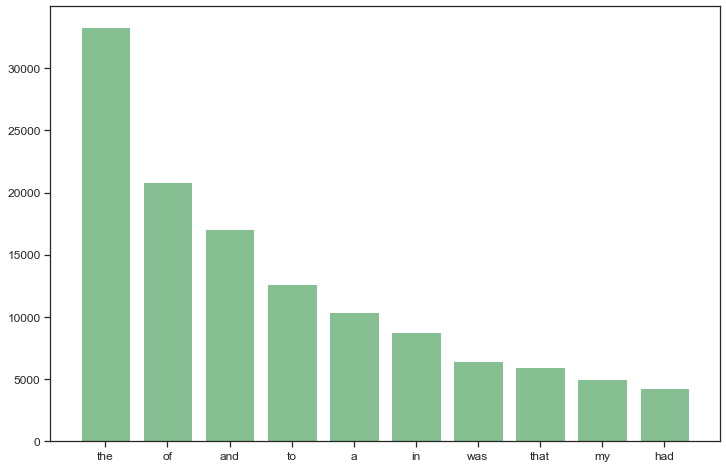

In [15]:
# You can put number of top stopwords that you want to depict on the barchart; default is top 10
eda_toolbox.plot_top_stopwords_barchart(present_stopwords) #eda_toolbox.plot_top_stopwords_barchart(dic, 20)

Now you can see <b>most frequent stopwords</b> occurring in our text.

<h3>Another most frequent words</h3>

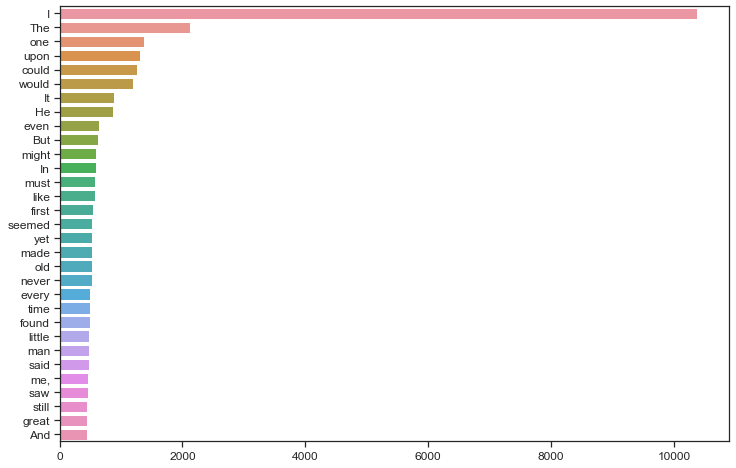

In [16]:
eda_toolbox.plot_top_non_stopwords_barchart(corpus)

<h3>N-Gram Exploration</h3>

><h3><b>CITED:</b></h3>
<i>In text processing, we usually work with bigrams (sequences of length 2), sometimes even trigrams (length 3). The reason to stick to n ≤ 3 is that the number of different n-grams increases exponentially with respect to n, while their frequencies decrease in the same way.[<a href="https://www.amazon.com/Blueprints-Text-Analytics-Using-Python/dp/149207408X">BOOK</a>]</i>

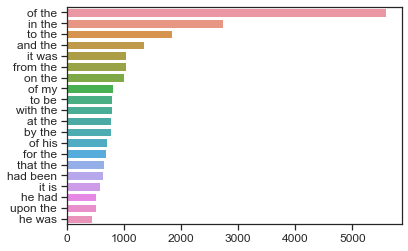

In [17]:
n_gram = 2
eda_toolbox.plot_top_ngrams_barchart(df['text'], corpus, n_gram, 20) #top 20; default is top 10

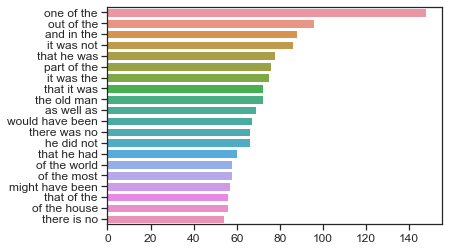

In [18]:
n_gram = 3
eda_toolbox.plot_top_ngrams_barchart(df['text'], corpus, n_gram, 20)

<h1>Analyzing text statistics per author</h1>

Let's get started visualized.

We will start and end this part with <b>Word Cloud Visualization</b>. 

On the start we depict cloud of words per author for random selected text and we will complete this analysis depicting cloud of words for whole dataset.

<h3>Word Cloud per Author Visualization</h3>

><h3><b>NOTE!</b></h3>
As the <b><i>word_cloud_per_instance</i></b> function grabs <b>random</b> authors' text results may vary.


 If you really wish me well, you will relieve this excitement." 


 Edgar Allan Poe 



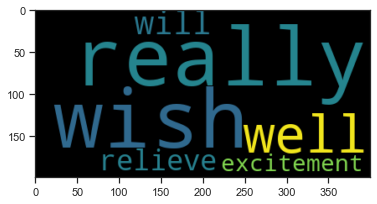


 But for all of their monstrousness they were not unfamiliar to me. 


 H. P. Lovecraft 



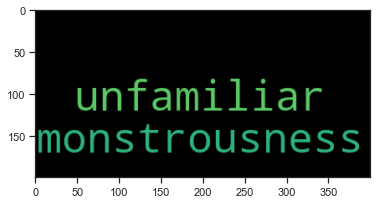


 The balloon rose about half a mile from the earth, and with a favourable wind it hurried through the air, its feathered vans cleaving the unopposing atmosphere. 


 Mary Shelley 



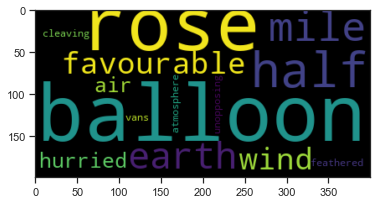

In [27]:
eda_toolbox.word_cloud_per_instance(df)

<h3>Word Frequency By Author</h3>

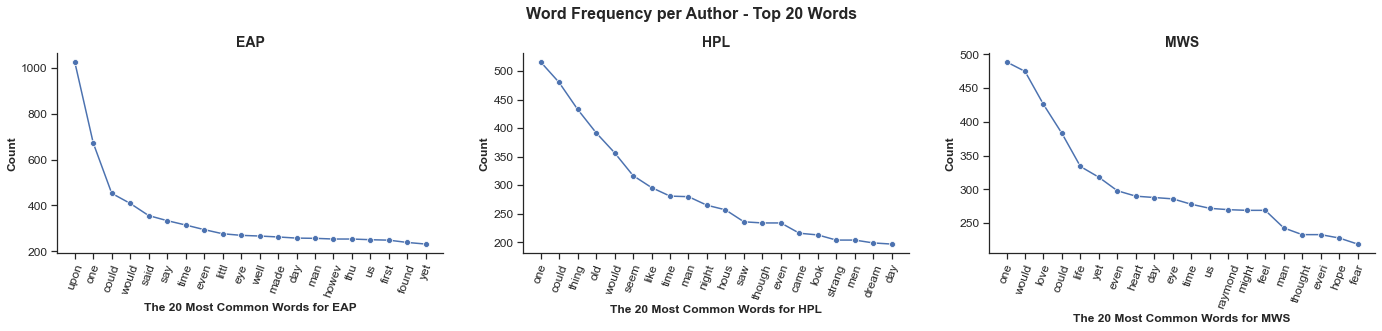

In [20]:
eda_toolbox.plot_word_freq_per_author(df)

<h3>Kernel Density Estimation</h3>

><h3><b>CITED:</b></h3>
<i>Kernel density estimation (KDE) is in some senses an algorithm which takes the mixture-of-Gaussians idea to its logical extreme: it uses a mixture consisting of one Gaussian component per point, resulting in an essentially non-parametric estimator of density.  [<a href="https://www.amazon.com/_/dp/1491912057?tag=oreilly20-20">BOOK</a>]</i>

Now, we will create <b>new features</b> to perfomrm another analysis in order to understand the pattern of the individual authors regarding the new features, as follow:
<ul>
    <li>Word Count - Total number of words in the sample</li>
    <li>Character Count - Total number of characters in the sample excluding spaces</li>
    <li>Word Density - Average length of the words used in the sample</li>
    <li>Punctuation Count - Total number of punctuations used in the sample</li>
    <li>Upper-Case to Lower-Case Words ratio - ratio of upper case words used and lower case words used in the text</li>
<ul>

In [21]:
# Select the features you want analyse
features_list = ['word_count','char_count','word_density','uppercase','lowercase','uppLow_ratio','punc_count']

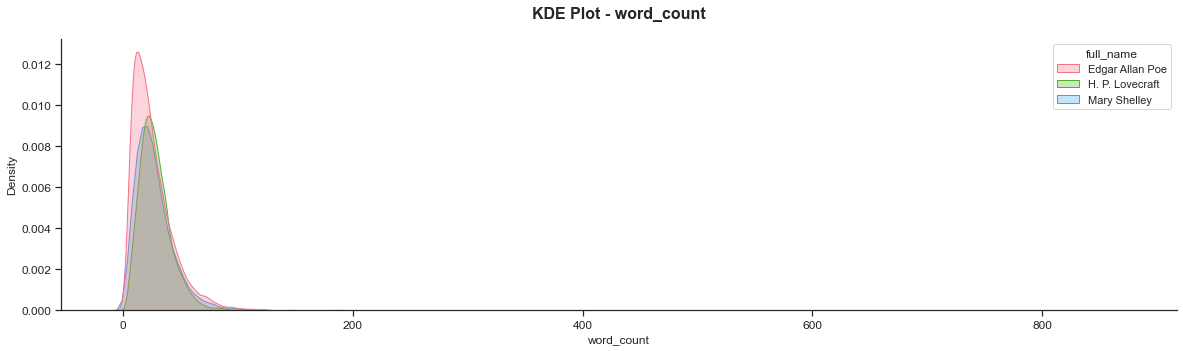

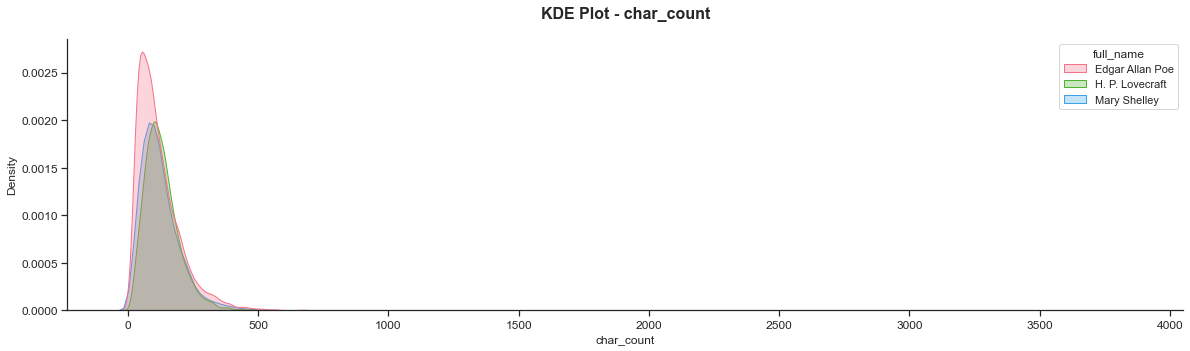

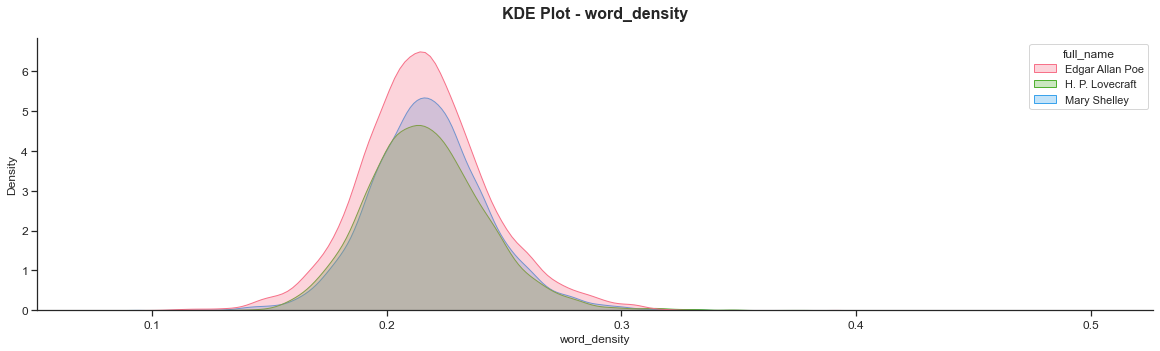

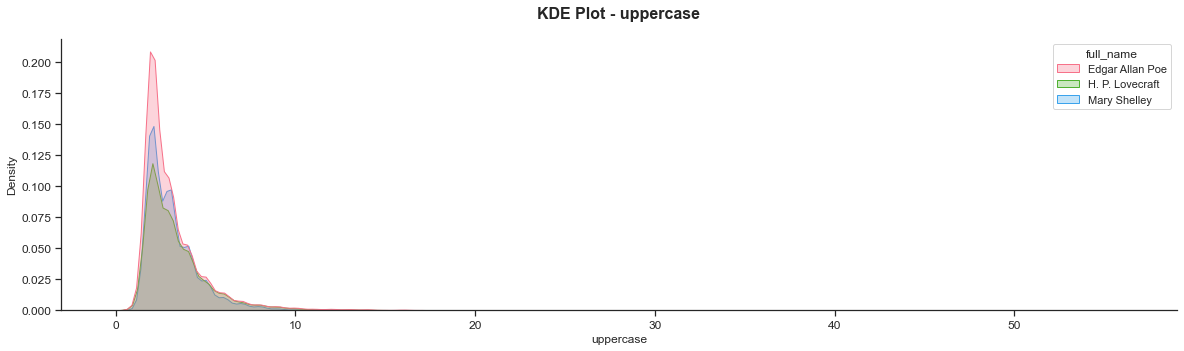

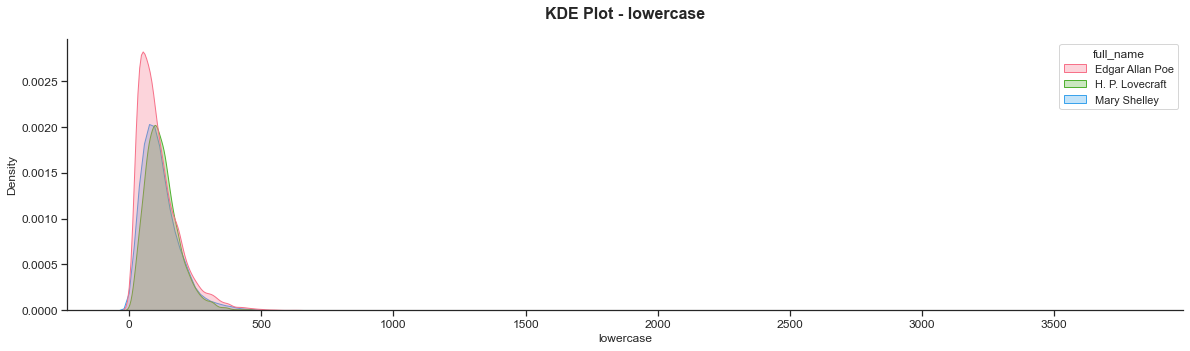

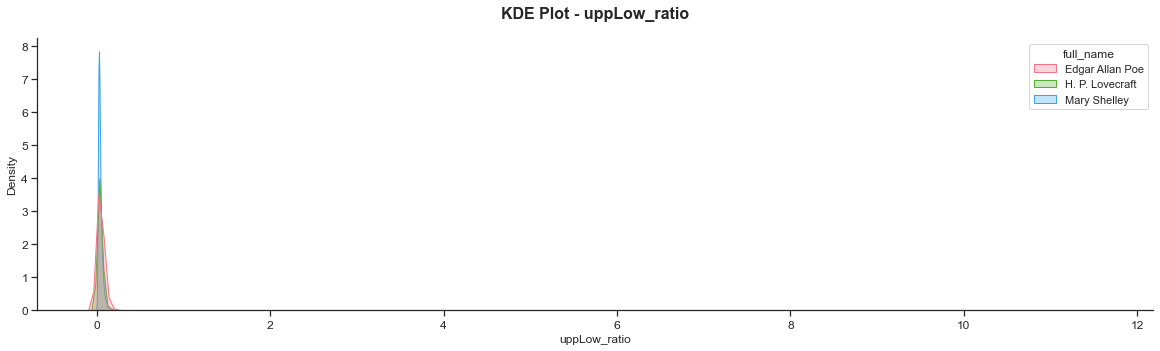

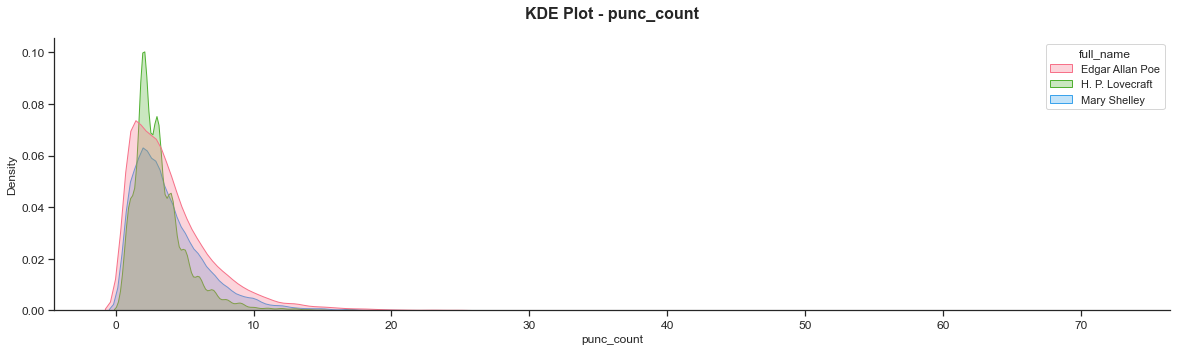

In [22]:
# Input should be whole data frame - df
eda_toolbox.kde_analysis(df, features_list)

As we can see only 'KDE Plot - word_density' has a bell like distribution (normal - Gauss distribution), all others are right skewed or positive skewed. Skewness point us to the outliers (<i>a.k.a.</i> extreme observations) presence in the data.

<h3>Box and Whistles Plotting</h3>

Now we will use <b>box plot</b> (<i>a.k.a.</i> box and whiskers) to visualise the outliers.

><ul>
    <li><b>Q1</b> – quartile 1, the median of the lower half of the data set</li>
    <li><b>Q2</b> – quartile 2 or <b>Median</b>, the median of the entire data set</li>
    <li><b>Q3</b> – quartile 3, the median of the upper half of the data set</li>
<ul>

    
<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="Different parts of a boxplot" width="500" height="600">
    
<!--  Image source: https://www.kdnuggets.com/2019/11/understanding-boxplots.html    -->

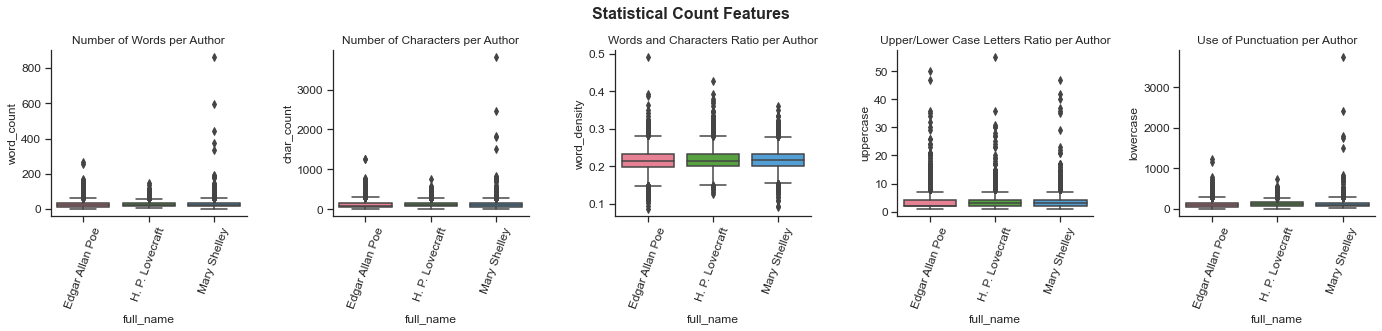

In [23]:
# Generate box plot for the selected features in features_list
eda_toolbox.plot_box_and_whislers(df, features_list)

The Q1, Q2, and Q3 quartiles of the authors are quite similar across the features.

We can notice that Mary Shelley presents more outliers regarding the first two plots (Number of Words/Characters per Author). It is the same for usage of punctuation per author, but Mary Shelley has less outliers for Upper/Lower Case Ratio per Author than the others.

<h3>Sentiment Analysis</h3>

We perform a sentiment analysis using AFFIN lexicon.

,text,author,score,sentiment_category
0,"This process, however, afforded me no means of...",Edgar Allan Poe,2.0,positive
1,It never once occurred to me that the fumbling...,H. P. Lovecraft,-2.0,negative
2,"In his left hand was a gold snuff box, from wh...",Edgar Allan Poe,8.0,positive
3,How lovely is spring As we looked from Windsor...,Mary Shelley,14.0,positive
4,"Finding nothing else, not even gold, the Super...",H. P. Lovecraft,-4.0,negative


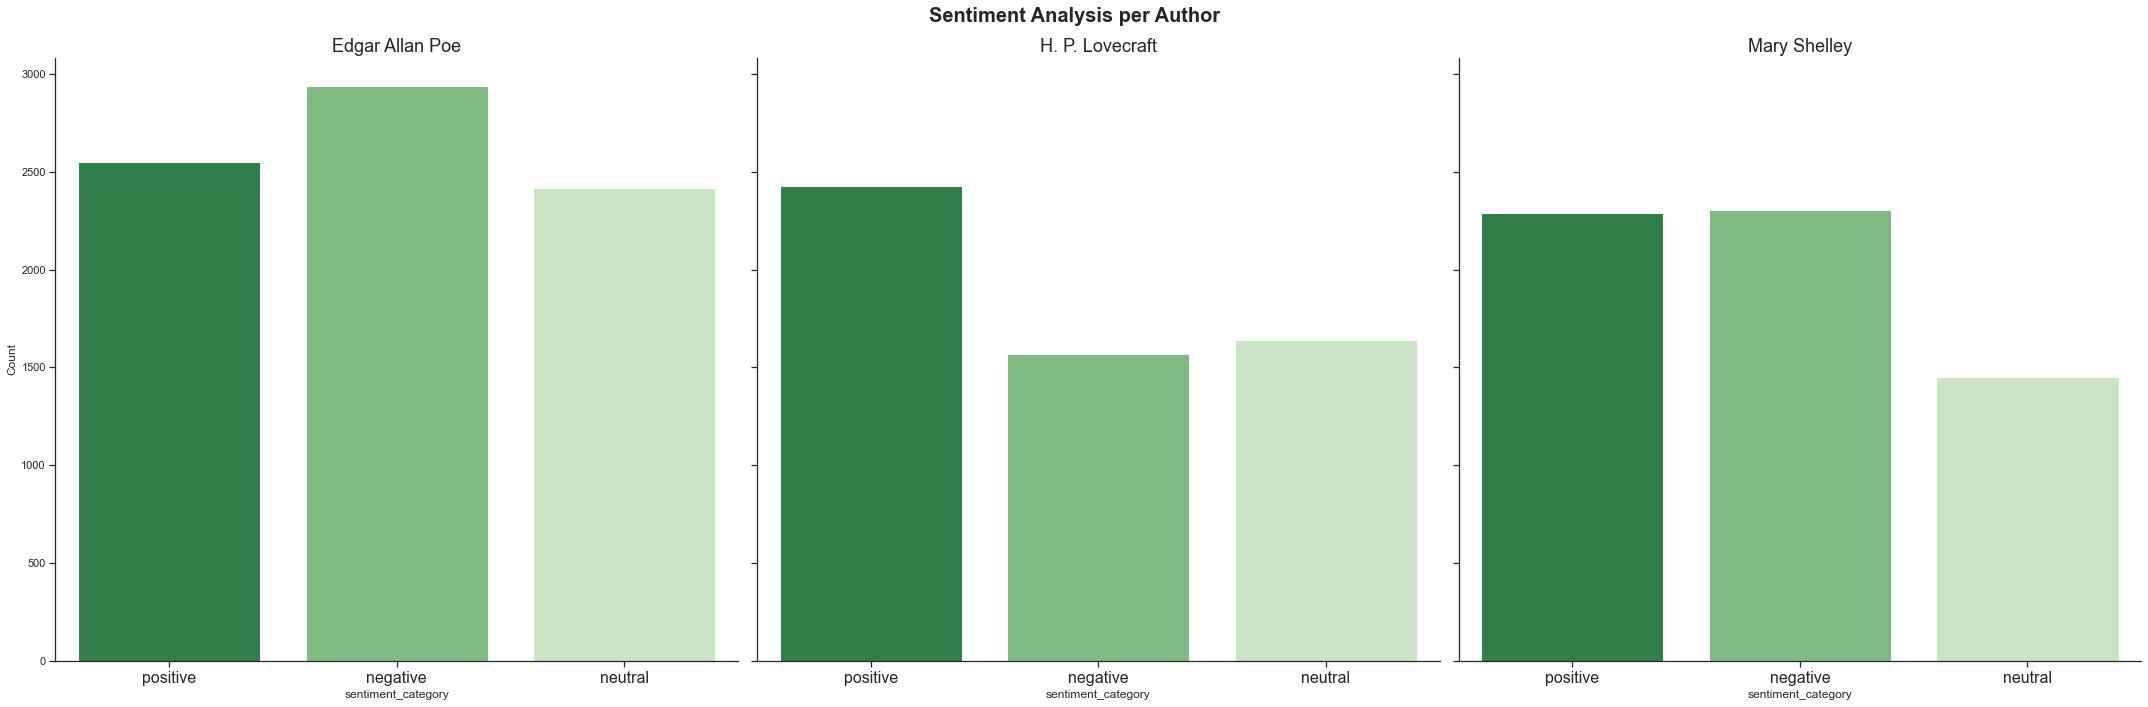

In [24]:
eda_toolbox.sentiment_analysis(df)

All authors show a quite similar amount of positive samples.

<b>Distribution of positive samples</b> is about <b>1/3</b> per author.

Let's remember, total amount of data: 19579.

That is about 6526 samples per author.

<b>Distribution of all samples</b> in the dataset:
<ul>
    <li>7900 for EAP <b>~40%</b></li> 
    <li>6044 for MWS <b>~31%</b></li> 
    <li>5635 for HPL <b>~29%</b></li>
</ul>  

As EAP takes ~40% of the whole dataset, that means other two authors jointly has ~60%.

That is interesting that the distribution of positive samples for MWS and HPL are close to ~30% (same as the distribution in whole dataset). That is not case for EAP, because of presence of imbalance between the distributions.

Additionally we can use <b>box plot</b> to present outliers for the sentiment analysis.


><h3><b>NOTE!</b></h3>
It is very important to <b>highlight</b> another possibilities/methods/tools for sentiment analysis, such as deep learning based sentiment analysis [<a href="https://www.mdpi.com/2079-9292/9/3/483">Sentiment Analysis Based on Deep Learning: A Comparative Study</a>]  <b><font size="-1">[OPEN ACCESS]</font></b>. 

<h3>Word Co-occurrence Analysis</h3>

><h3><b>CITED:</b></h3>
<i>This technique creates co-occurrence rules that can be used to create a new category, extend a category, or as input to another category technique. Two concepts strongly co-occur if they frequently appear together in a set of records and rarely separately in any of the other records. This technique can produce good results with larger datasets with at least several hundred documents or records.
    <h3><b>NOTE!</b></h3>
<i>With small datasets (< 1000 responses) you may not find any co-occurrences with the default settings. If so, try increasing the search distance value.[<a href="https://www.ibm.com/docs/en/spss-modeler/SaaS?topic=techniques-co-occurrence-rules">DOCUMENT</a>]</i>

><h3><b>NOTE!</b></h3>
Before performing this common analysis I want to reference several useful papers. For deeper study of data several sci papers should be considered. Not only this is a good practice in general, it is something which is important to being stay state-of-the-art. [<a href="https://www.sciencedirect.com/science/article/pii/S1532046406001328">Paper 1</a>, <a href="https://arxiv.org/abs/1904.08010">Paper 2</a>]  <b><font size="-1">[OPEN ACCESS]</font></b>. 

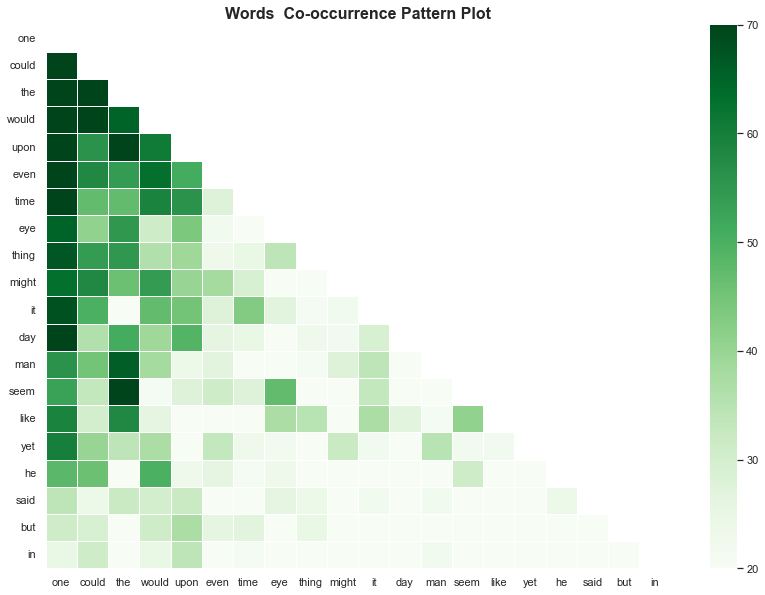

In [25]:
eda_toolbox.cooccurrence_analysis(df)

<h3>Word Cloud for Whole Dataset</h3>

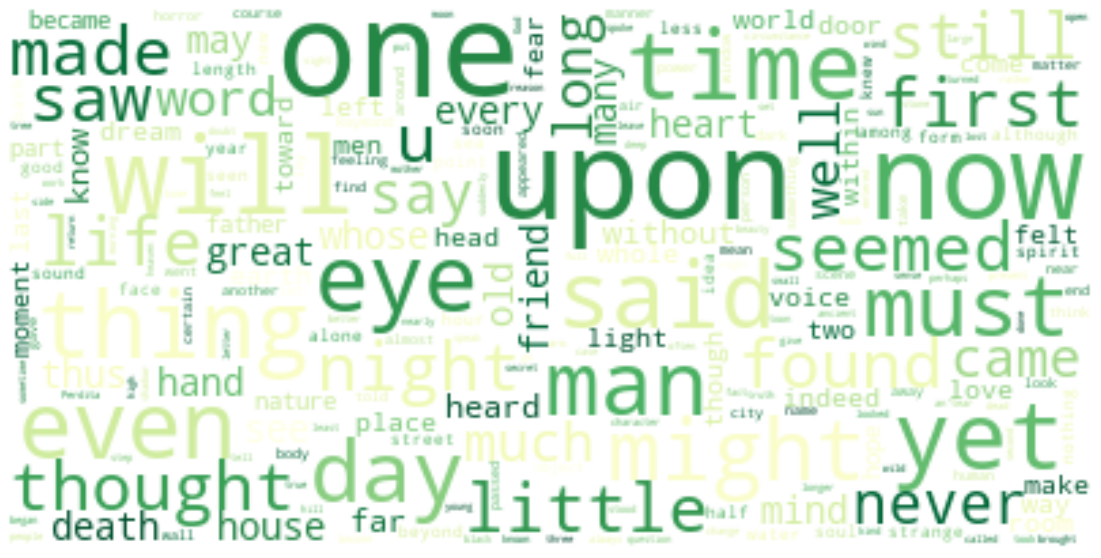

In [26]:
eda_toolbox.word_cloud_for_dataset(df)

<h3>Topic Modelling - Latent Dirichlet Allocation</h3>


At the very end I <b>would propose</b> once more method in data analysis. 

><h3><b>CITED:</b></h3>
<i>There are several existing algorithms you can use to perform the topic modeling. The most common of it are, Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA) [<a href="https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0">DOCUMENT</a>]<i>

><h3><b>NOTE!</b></h3>
Useful resources:
><ul>
    <li><a href="https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf">Sci Paper</a></li>
    <li><a href="https://pypi.org/project/pyLDAvis/">Pypi</a></li>
    <li><a href="https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb">Nbviewer</a></li>
    <li><a href="https://github.com/bmabey/pyLDAvis/blob/master/README.rst">Github</a></li>
    </ul>